<a href="https://colab.research.google.com/github/Akanksha-neural-networks/MPP_Assignments/blob/main/EEG_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.signal import butter, lfilter
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('/content/features_raw.csv')
data.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


In [3]:
data.columns

Index(['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
       'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6',
       'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2',
       'Unnamed: 32'],
      dtype='object')

In [4]:
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])

In [5]:
data = data.dropna(axis=1, how='all')

In [6]:
data.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-30.579542,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-1.290516,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,11.424923,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-14.721411,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,-13.815090,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816


In [7]:
print(data.isnull().sum())

Fp1    0
AF3    0
F3     0
F7     0
FC5    0
FC1    0
C3     0
T7     0
CP5    0
CP1    0
P3     0
P7     0
PO3    0
O1     0
Oz     0
Pz     0
Fp2    0
AF4    0
Fz     0
F4     0
F8     0
FC6    0
FC2    0
Cz     0
C4     0
T8     0
CP6    0
CP2    0
P4     0
P8     0
PO4    0
O2     0
dtype: int64


In [8]:
def compute_psd(data, fs):
    freqs, psd = welch(data, fs, nperseg=fs*2)
    return psd

In [9]:
fs = 128
features = data.apply(lambda x: compute_psd(x, fs))

In [10]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(features)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

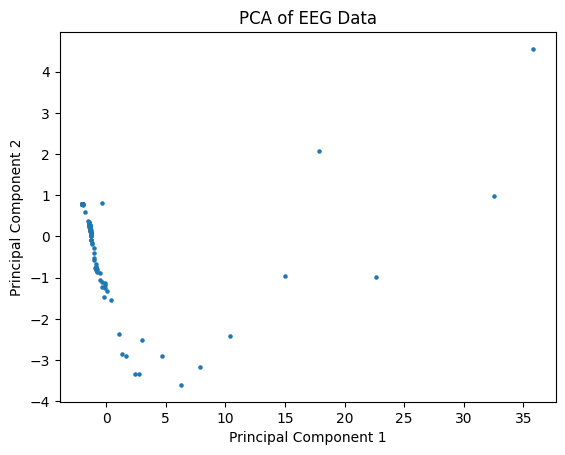

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.title('PCA of EEG Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


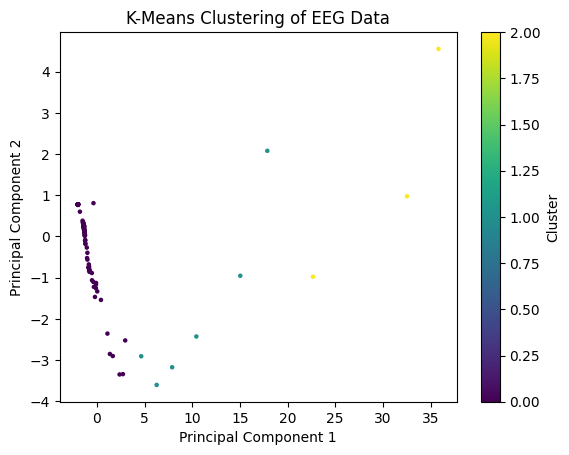

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

cluster_labels = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.title('K-Means Clustering of EEG Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

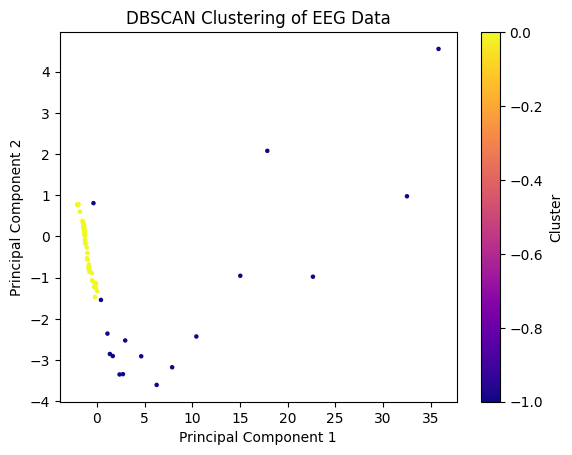

In [14]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_normalized)

dbscan_labels = dbscan.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=5)
plt.title('DBSCAN Clustering of EEG Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
silhouette_avg = silhouette_score(X_normalized, cluster_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.8446655276009526


In [16]:
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

Cluster centroids:
 [[-0.21312402 -0.22248757 -0.23174809 -0.22875272 -0.22231006 -0.22248885
  -0.21993567 -0.22204401 -0.22082589 -0.2390525  -0.23040768 -0.22903974
  -0.23442466 -0.22628449 -0.20922893 -0.23636453 -0.23442977 -0.23478882
  -0.23736863 -0.22919645 -0.22486789 -0.22065492 -0.22498905 -0.22136065
  -0.22672189 -0.21787317 -0.22287462 -0.22249249 -0.2228807  -0.22161055
  -0.22463371 -0.22924233]
 [ 2.66664206  1.61864373  2.36522008  1.78793772  1.6320931   1.65385886
   1.56280427  1.64718338  1.59538066  2.15028729  1.85474145  1.81535624
   1.99584465  1.74085273  2.08981036  2.06635845  1.98084369  2.02048625
   2.33556643  1.82514094  1.70475253  1.59346019  1.71042456  2.18073229
   1.73186491  1.54736762  1.65479329  1.64176256  1.65488655  1.60291358
   1.70516088  1.84935581]
 [ 3.19167679  5.66221537  4.53948345  5.57423324  5.6282161   5.59183617
   5.67181813  5.58739362  5.6422742   5.26152532  5.50682419  5.53087709
   5.3852973   5.56967408  4.18953633 

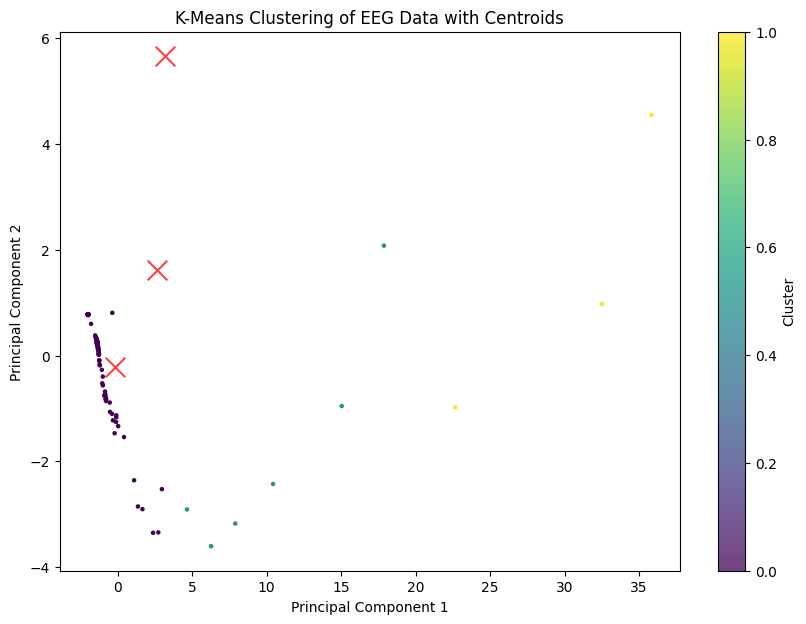

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering of EEG Data with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()